In [8]:
# Useful starting lines
%matplotlib inline
import datetime
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [95]:
from proj1_helpers import *
from implementations_s import*
from cross_validation import *

In [3]:
DATA_TRAIN_PATH = '../../data/train.csv'
y, x, ids = load_csv_data(DATA_TRAIN_PATH)

### Cleaning of the dataset

In [56]:
selector = np.all(x != -999.0, axis=1)

x_clean = x[selector]
y_clean = y[selector]
x_clean,_,_ = standardize(x_clean)
print("We removed", (1-x_clean.shape[0]/x.shape[0])*100, "% of our training dataset.")

We removed 72.7544 % of our training dataset.


In [106]:
x_nan = helpers.replace_mean(x)
x_clean = x_nan
y_clean = y

### Least squares

In [44]:
least_squares_demo(y_clean, x_clean, 4)

   mse=0.7348122615634057
   accuracy=0.725


### Least Squares GD

In [49]:
LS_GD_demo(y_clean, x_clean, 4)

   gamma=0.215, mse=0.737
   accuracy=0.726


### Least Square SGD

In [66]:
LS_SGD_demo(y_clean, x_clean, 4)

   gamma=0.316, batch=1.00, mse=0.738
   accuracy=0.725


### Ridge Regression

   lambda=0.000, mse=0.600
   accuracy=0.790


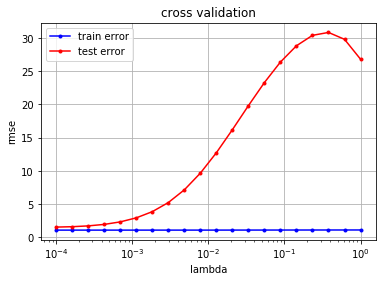

In [112]:
ridge_regression_demo(y_clean, x_clean, degree=4, k_fold=4)

### Logistic regression

In [93]:
lr_demo(y_clean, x_clean, 4)

   gamma=0.001,loss=-26008.978
   accuracy=0.685


### Regularized logistic regression

In [101]:
lrr_demo(y_clean, x_clean, 4)

KeyboardInterrupt: 